<a href="https://colab.research.google.com/github/soyab266/test/blob/master/MISSING_CATEGORICAL_DATA_DEAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [42]:
df=pd.read_csv('trainhousing.csv', usecols=['GarageQual','FireplaceQu','SalePrice'])
df.head(5)

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [43]:
df.isnull().mean()*100


FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

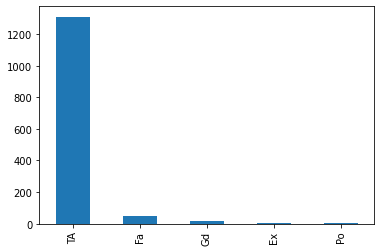

In [45]:
df['GarageQual'].value_counts().plot(kind='bar')
#df['GarageQual'].value_counts().plot(kind='bar')

In [5]:
df['GarageQual'].mode()

0    TA
dtype: object

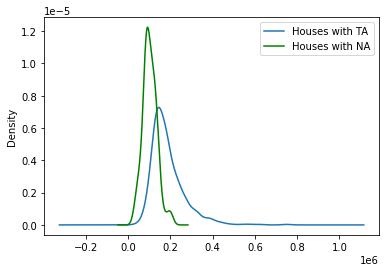

In [12]:
fig=plt.figure()
ax=fig.add_subplot(111)
df[df['GarageQual']=='TA']['SalePrice'].plot(kind='kde',ax=ax)
df[df['GarageQual'].isnull()]['SalePrice'].plot(kind='kde', ax=ax,color='green')
lines, labels = ax.get_legend_handles_labels()
labels = ['Houses with TA', 'Houses with NA']
ax.legend(lines, labels, loc='best')



In [13]:
TEMP=df[df['GarageQual']=='TA']['SalePrice']

In [14]:
df['GarageQual'].fillna('TA', inplace=True)

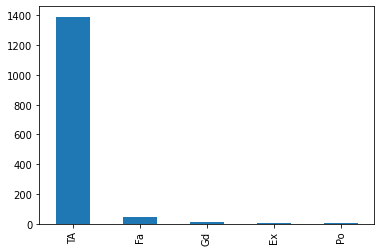

In [16]:
df['GarageQual'].value_counts().plot(kind='bar')

In [18]:
df['GarageQual'].isnull().sum()

0

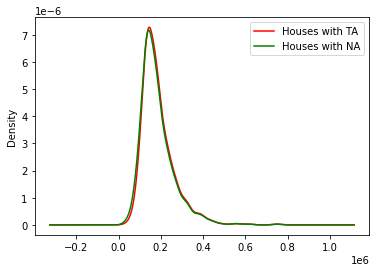

In [20]:
fig=plt.figure()
ax=fig.add_subplot(111)
TEMP.plot(kind='kde',ax=ax,color='red')
df[df['GarageQual']=='TA']['SalePrice'].plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
labels = ['Houses with TA', 'Houses with NA']
ax.legend(lines, labels, loc='best')



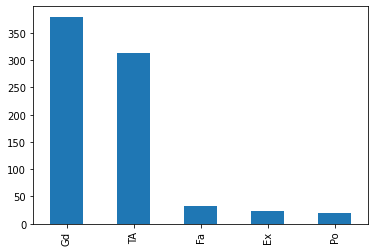

In [44]:

df['FireplaceQu'].value_counts().plot(kind='bar')


In [27]:
df['FireplaceQu'].isnull().mean()*100

47.26027397260274

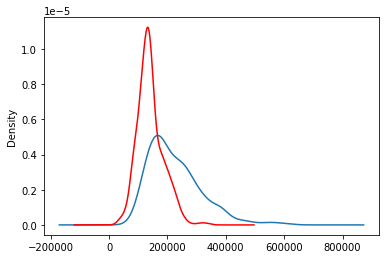

In [45]:
fig=plt.figure()
ax=fig.add_subplot(111)
df[df['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde', ax=ax)
df[df['FireplaceQu'].isnull()]['SalePrice'].plot(kind='kde',ax=ax, color='red')

In [30]:
temp=df[df['FireplaceQu']=='Gd']['SalePrice']

In [31]:
df['FireplaceQu'].fillna('Gd', inplace=True)

In [32]:
df['FireplaceQu'].isnull().sum()

0

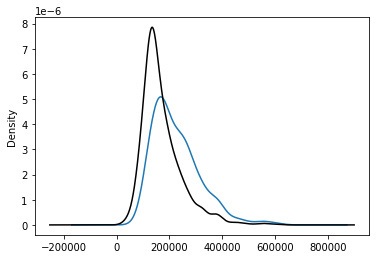

In [33]:
fig=plt.figure()
ax=fig.add_subplot(111)
temp.plot(kind='kde', ax=ax)
df[df['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde',color='black')

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop(columns=['SalePrice']), df['SalePrice'], test_size =0.5)

In [35]:
from sklearn.impute import SimpleImputer

In [38]:
imputer=SimpleImputer(strategy='most_frequent')

In [39]:
xtrain=imputer.fit_transform(X_train)
xtest= imputer.transform(X_test)

In [40]:
imputer.statistics_

array(['Gd', 'TA'], dtype=object)

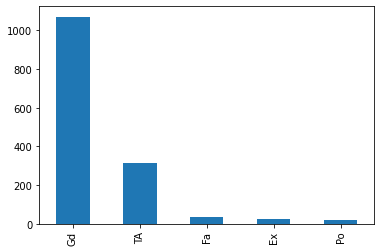

In [41]:
df['FireplaceQu'].value_counts().plot(kind='bar')

MISSING CATEGORY IMPUTATION


In [46]:
df['FireplaceQu'].fillna('missing',inplace=True)

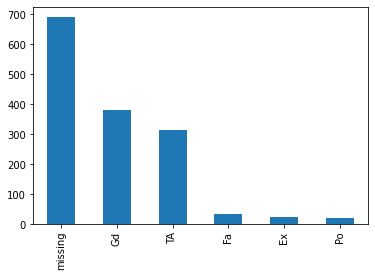

In [47]:
df['FireplaceQu'].value_counts().plot(kind='bar')

In [52]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop(columns=['SalePrice']),df['SalePrice'],test_size=0.9)
imputer=SimpleImputer(strategy='constant' ,fill_value='Missing')

In [53]:
xtrain=imputer.fit_transform(X_train)
xtest=imputer.transform(X_test)

In [54]:
imputer.statistics_

array(['Missing', 'Missing'], dtype=object)